# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz


#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/efcm_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_6_n_content,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,...,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,1.583196e-04,15187,37,35,301,2,1,2,0,2,...,0.385013,0.385415,166.409553,5.214479,0.035844,0.064873,170.618513,1.005274,0.391439,18.665416
1,1.117211e-04,733019,38,301,301,0,2,2,0,2,...,0.121340,0.068446,166.392354,5.221345,0.020362,0.062808,170.592963,1.019400,0.082491,4.776467
2,5.114000e-07,269263,38,35,301,1,2,2,0,2,...,0.315845,0.165511,166.140604,5.451245,0.023010,0.064142,170.641425,0.982654,0.147022,9.723556
3,6.196000e-07,265224,38,35,301,0,1,2,0,2,...,1.027438,0.425438,156.377108,14.652466,0.024049,0.065723,170.626139,0.994454,0.156148,10.238692
4,9.081810e-05,733019,39,301,301,0,2,2,0,2,...,0.262169,0.086567,165.721361,5.845131,0.020997,0.064547,170.592963,1.019400,0.085682,5.014081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,9.438420e-05,1367226,38,35,251,2,2,2,0,2,...,0.051924,0.072236,166.420364,4.940322,0.028492,0.066430,170.461306,1.161733,0.035012,3.259176
84,1.997554e-03,1836688,39,35,251,2,2,2,0,2,...,0.088583,0.075866,166.432328,5.183535,0.025113,0.067765,170.397161,1.134837,0.040512,2.163178
85,8.432410e-05,799870,37,35,251,2,2,2,0,2,...,0.067566,0.062786,166.649269,4.959551,0.029550,0.067901,170.407269,1.203378,-1.156613,0.001990
86,2.184314e-03,1369977,39,35,251,2,2,2,0,2,...,0.075292,0.070757,166.049585,5.179259,0.025674,0.067058,170.497554,1.105446,0.044248,2.964755


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

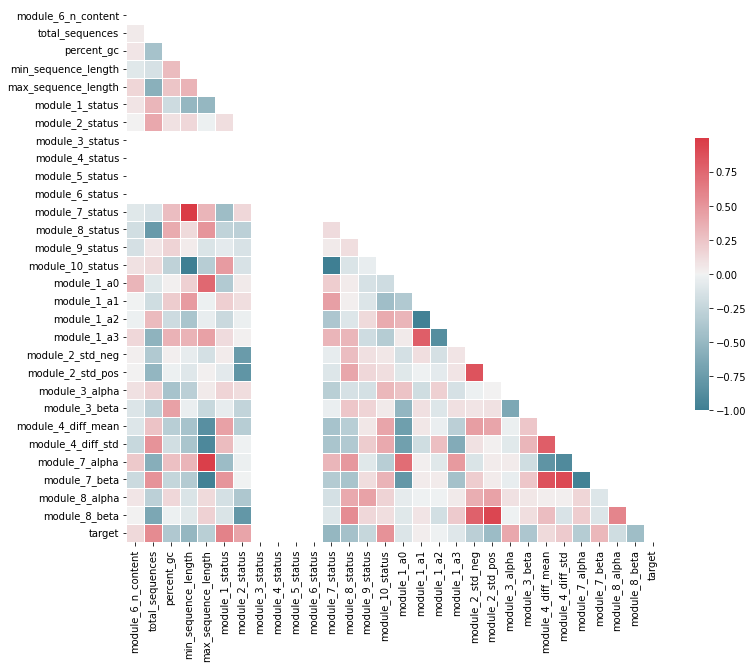

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7407407407407407
Precision:  0.7083333333333334
Recall:  1.0
F1 Score:  0.8292682926829268


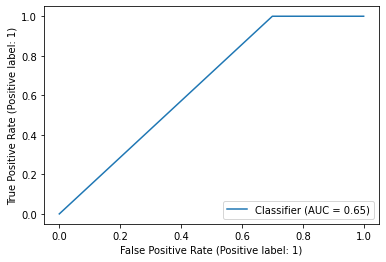

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [1.         0.94444444 0.83333333 0.76470588 0.64705882]
F1 Scores:  [1.         0.95652174 0.88       0.83333333 0.78571429]
Accuracy: 0.84 +/- 0.13
F1 Score: 0.89 +/- 0.08


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  1.0
Recall:  0.8823529411764706
F1 Score:  0.9375


[Text(0.4444444444444444, 0.875, 'module_2_std_neg <= 0.113\ngini = 0.477\nsamples = 61\nvalue = [24, 37]\nclass = good'),
 Text(0.2222222222222222, 0.625, 'min_sequence_length <= 143.0\ngini = 0.056\nsamples = 35\nvalue = [1, 34]\nclass = good'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = good'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.6666666666666666, 0.625, 'total_sequences <= 784937.5\ngini = 0.204\nsamples = 26\nvalue = [23, 3]\nclass = ugly'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = ugly'),
 Text(0.7777777777777778, 0.375, 'module_7_alpha <= 170.509\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = ugly'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = ugly'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = good')]

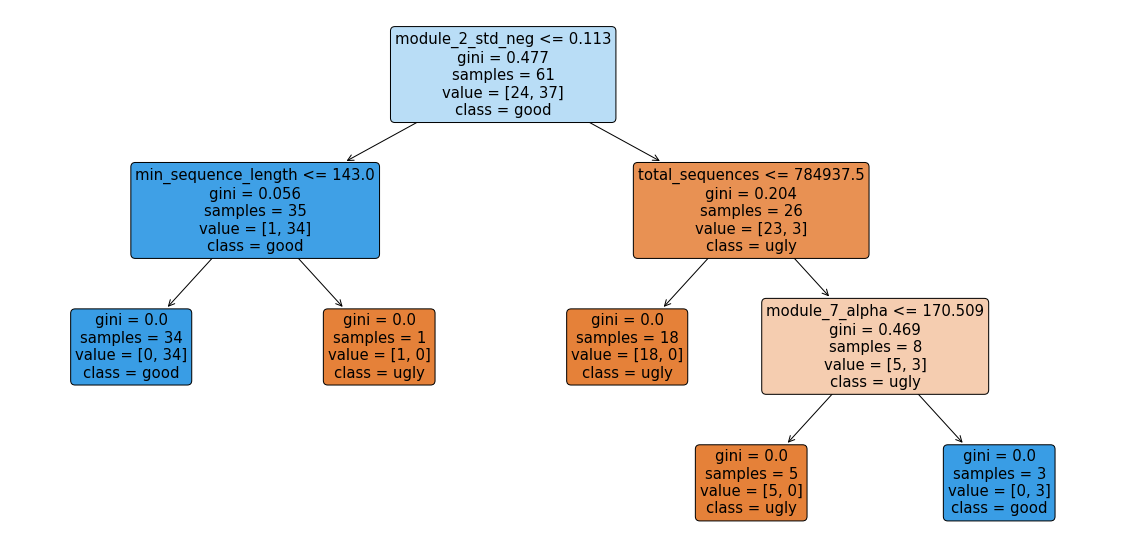

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [18]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [19]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [20]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


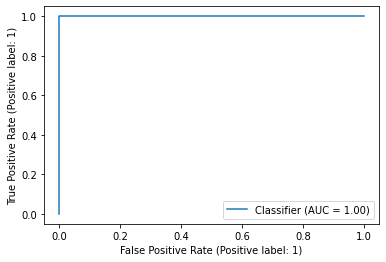

In [21]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

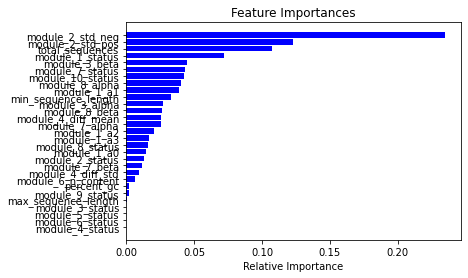

In [22]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [23]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.72222222 0.94444444 1.         1.         0.76470588]
F1 Scores:  [0.70588235 0.95652174 1.         1.         0.84615385]
Accuracy: 0.89 +/- 0.12
F1 Score: 0.90 +/- 0.11


#### Visualize some trees of the Random Forest

[Text(0.2857142857142857, 0.9, 'module_10_status <= 1.0\ngini = 0.47\nsamples = 41\nvalue = [23, 38]\nclass = good'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [7, 0]\nclass = ugly'),
 Text(0.42857142857142855, 0.7, 'total_sequences <= 570662.0\ngini = 0.417\nsamples = 36\nvalue = [16, 38]\nclass = good'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [12, 0]\nclass = ugly'),
 Text(0.5714285714285714, 0.5, 'module_2_std_pos <= 0.108\ngini = 0.172\nsamples = 27\nvalue = [4, 38]\nclass = good'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 36]\nclass = good'),
 Text(0.7142857142857143, 0.3, 'total_sequences <= 1145923.0\ngini = 0.444\nsamples = 3\nvalue = [4, 2]\nclass = ugly'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]\nclass = good'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]\nclass = ugly')]

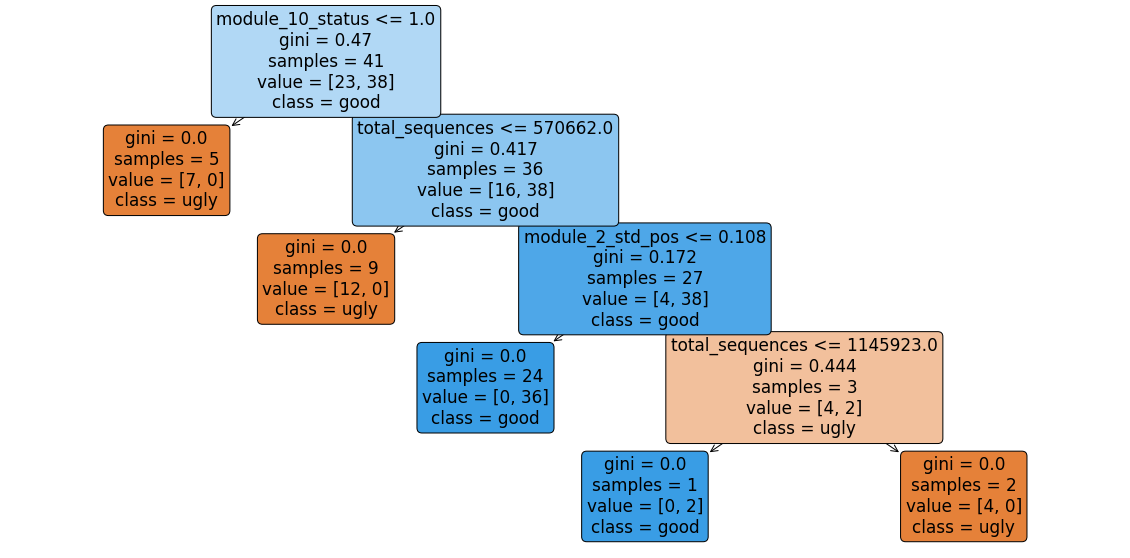

In [24]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.5, 0.9, 'module_1_status <= 1.5\ngini = 0.451\nsamples = 34\nvalue = [21, 40]\nclass = good'),
 Text(0.3, 0.7, 'module_2_std_neg <= 0.154\ngini = 0.245\nsamples = 10\nvalue = [12, 2]\nclass = ugly'),
 Text(0.2, 0.5, 'module_4_diff_mean <= 0.021\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = good'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = good'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [11, 0]\nclass = ugly'),
 Text(0.7, 0.7, 'total_sequences <= 536156.0\ngini = 0.31\nsamples = 24\nvalue = [9, 38]\nclass = good'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [7, 0]\nclass = ugly'),
 Text(0.8, 0.5, 'module_1_a2 <= 0.0\ngini = 0.095\nsamples = 21\nvalue = [2, 38]\nclass = good'),
 Text(0.7, 0.3, 'module_3_alpha <= 165.728\ngini = 0.278\nsamples = 6\nvalue = [2, 10]\nclass = good'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = ugly'),
 Text(0.

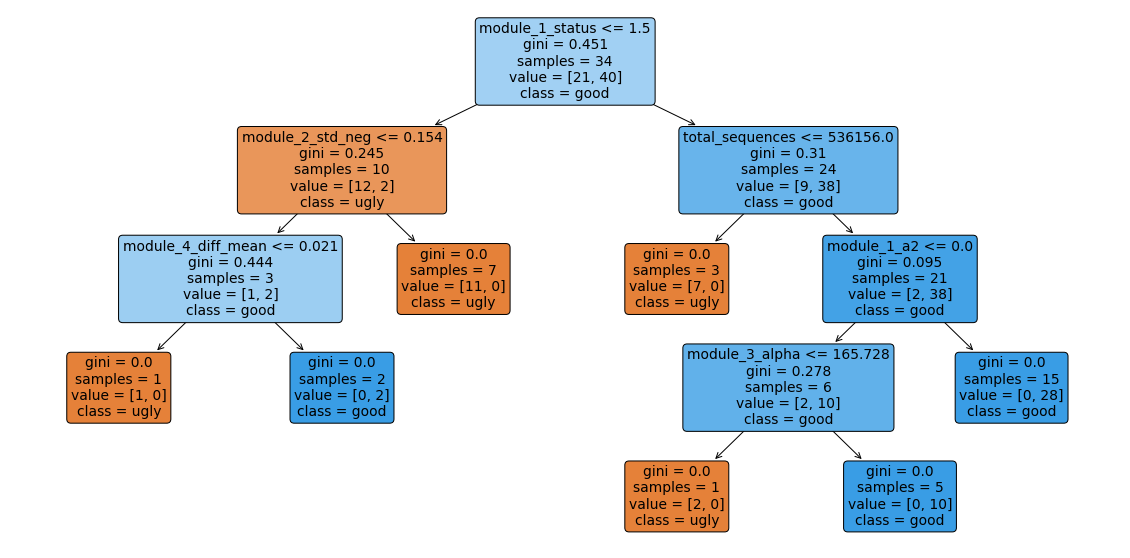

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [27]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189


Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [29]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.68
Recall:  1.0
F1 Score:  0.8095238095238095


K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.7647058823529411
Recall:  0.7647058823529411
F1 Score:  0.7647058823529412
